<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/ANN_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cho học dữ liệu cổng OR

#tao du lieu
from sklearn.linear_model import Perceptron
import pandas as pd

#từ bảng trạng thái cổng OR
x = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]])  #x1 va x2
t =  pd.DataFrame([0,1,1,1])   # y

#tao mo hinh
model = Perceptron()
#fit mo hinh
model.fit(x,t)
#danh gia mo hinh
model.score(x,t)
#test mo hinh
x1 = pd.DataFrame([[0.5,-1],[0.5,0.5],[-10,1],[5,1]])
y1 = model.predict(x1)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y1

array([0, 1, 0, 1])

In [ ]:
model.score(x1,y1)

1.0

In [ ]:
x2 = pd.DataFrame([[-0.5,-0.5],[-0.5,0.5],[0.3,-0.5],[-0.1,1]])
y2 = pd.DataFrame([1,1,0,0])
#tao mo hinh
model1 = Perceptron()
#fit mo hinh
model1.fit(x2,y2)
#danh gia mo hinh
model1.score(x2,y2)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [ ]:
#test mo hinh
x3 = pd.DataFrame([[-0.5,-0.5],[0.5,0.5],[-10,1],[5,1]])
y3 = model1.predict(x3)
y3

array([1, 0, 1, 0])

BAI 2 IRIS

In [17]:
#bai tap moi
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split #80% train, 20% test
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler #chuan hoa tat ca du lieu, scale lai cho dong deu

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #vẽ biểu đồ phân bố dữ liệu

#goi tap du lieu
iris = datasets.load_iris()




In [ ]:
#hien ra cac feature
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
#kiem tra cau hinh cua du lieu
iris['data'].shape

(150, 4)

In [ ]:
#tao dataframe cho iris
iris_dataframe = pd.DataFrame(iris['data'])

In [ ]:
#HIEN DATAFRAME CUA ISRIS
iris_dataframe.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#hien ra cac feature
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

<Axes: >

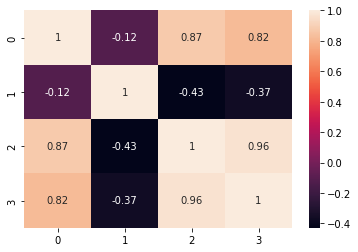

In [ ]:
#kiem tra do lien quan
corr = iris_dataframe.corr()
sns.heatmap(corr,annot=True)

In [ ]:
X = iris.data
y = iris.target
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Qua trinh scale lai cac du lieu cho dong deu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3) #train size se la 0.7
sc = StandardScaler()
sc.fit_transform(X_train) #hoc ti so sau khi scale
X_train_std = sc.transform(X_train) # truyen du lieu vo 
X_test_std = sc.transform(X_test)
print(X_train_std[:5])
print(X_test_std[:5])
#scale xong so sanh voi gia tri luc chua scale

[[ 0.14281842  0.31436138  0.65286813  0.87760602]
 [ 1.15949194  0.53589122  1.1652937   1.80974537]
 [ 0.77823937  0.09283155  1.05142135  0.87760602]
 [-0.23843415 -0.79328778  0.31125109  0.2117922 ]
 [-1.25510766  0.75742105 -0.99828092 -1.25299819]]
[[ 0.52407099  0.75742105  0.99448518  1.54341984]
 [ 2.04908127 -0.57175795  1.3930384   1.01076879]
 [-0.23843415 -0.35022812 -0.03036596  0.2117922 ]
 [-0.87385509  0.97895088 -1.28296179 -1.11983543]
 [ 1.41366032  0.09283155  0.99448518  1.27709431]]


**train mo hinh du lieu da scale **

In [ ]:
model5 = Perceptron(max_iter=40,eta0=0.75,random_state=0)
model5.fit(X_train_std,y_train)

y_pred = model5.predict(X_test_std)
print(y_pred)
print(y_test)
print('Do chinh xac cua mo hinh:',accuracy_score(y_test,y_pred))

[2 2 1 0 2 1 1 2 0 0 0 1 2 2 1 0 2 1 2 2 2 1 1 1 2 1 2 2 2 0 2 0 1 0 0 1 1
 2 1 0 0 0 2 2 2]
[2 2 1 0 2 1 1 2 0 0 0 2 2 2 1 0 2 1 2 2 2 1 1 1 1 1 2 2 2 0 2 0 1 0 0 1 1
 1 1 0 0 0 1 2 2]
Do chinh xac cua mo hinh: 0.9111111111111111


TEst mo hinh

In [ ]:
x1 = np.array([[8,0,7,3]])
y1 = model5.predict(x1)
y1

array([2])

**bai crab**

In [3]:
#bai tap. xác định giới tính của loài cua dựa trên 5 thông số cung cấp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#1 tim do lien quan (correlation)
import pandas as pd
dataframe = pd.read_csv('crabs.csv')


In [ ]:
#xoa 1 loai ra
dataframe[dataframe['speies'] != 'B'].head(10) #xoa hàng chứa chữ B

In [ ]:
#loc ra du lieu loài O
carbO_dataframe = dataframe[dataframe['speies'] != 'B']
carbO_dataframe.head()

In [4]:
#tao ra dataset gioi tinh
crab_target = pd.DataFrame(dataframe['sex'][dataframe['speies'] == 'B'])
#tao ra dataset gom 5 thong so
crab_features = dataframe[dataframe['speies']=='B'].drop(['speies','sex','index'],axis = 1)

In [5]:
#endcode dau ra (M or F)
crab_target[crab_target['sex'] == 'M'] = 1
crab_target[crab_target['sex'] == 'F'] = 0

In [6]:
#kiem tra kich co cua cai crab_feature
crab_features.shape

(100, 5)

In [7]:
#kiem tra kich co cua cai crab_target
crab_target.shape

(100, 1)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#scale lai 5 thong so kia cho dong deu
std_crab = StandardScaler()
carb_features_scl = std_crab.fit_transform(crab_features)
#split data ra thanh 2 phan, train va test (test 30%)
x_crab_train, x_crab_test, target_sex_train, target_sex_test = train_test_split(carb_features_scl,crab_target,test_size=0.3)


In [11]:
x_crab_train.shape #(70%)

(70, 5)

In [12]:
x_crab_test.shape #(30%)

(30, 5)

In [21]:
#train mo hinh
from sklearn.linear_model import Perceptron
percep_crab = Perceptron(max_iter=500,eta0=0.01,random_state=0) #chinh eta thi chay lai tu doan scale
#percep_crab la ten mo hinh
target_sex_train=target_sex_train.astype('int')
percep_crab.fit(x_crab_train,target_sex_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(eta0=0.01, max_iter=500)

In [22]:
#danh gia mo hinh
sex_pred = percep_crab.predict(x_crab_test)
print('Do chinh xac cua mo hinh:',accuracy_score(target_sex_test,sex_pred))

Do chinh xac cua mo hinh: 0.9


In [35]:
#test mo hinh
import numpy, random, os
x1 = np.array([[random.random(),random.random(),random.random(),random.random(),random.random()]])
y1 = percep_crab.predict(x1)
if(y1 == 0 ):
  print("Female")
else:
  print("male")

male
